In [1]:
# import pandas, numpy and matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read xlsx file and convert columns to DataFrame
db = pd.ExcelFile('airports.xlsx')
intl_apt = pd.read_excel(db, 'intl_apt')
intl_flt = pd.read_excel(db, 'intl_flt')
us_apt = pd.read_excel(db, 'us_apt')

In [3]:
# Ensure the origin and destination airports of each airline exist and at least one of them is in the U
intl_flt1 = intl_flt[(intl_flt['Year']!= 2019) & (intl_flt['airport_1'].isin(intl_apt['IATA'])) & (intl_flt['airport_2'].isin(intl_apt['IATA'])) & ((intl_flt['airport_1'].isin(us_apt['IATA'])) | (intl_flt['airport_2'].isin(us_apt['IATA'])))]
intl_flt1

,passengers,Year,Month,airport_1,airport_2,scheduled
0,519027,1990,1,ACY,FPO,0
1,573101,1990,1,ACY,YYZ,0
2,595941,1990,1,ALB,FPO,0
3,539867,1990,1,ALB,YUL,56
4,513249,1990,1,ANC,AMS,1418
...,...,...,...,...,...,...
642994,36168,2018,12,VNY,NRT,0
642995,36167,2018,12,VNY,SXM,0
642996,36166,2018,12,VNY,YVR,0
642997,36165,2018,12,VRB,MHH,0


In [4]:
# Create lists of year, month and passengers
year = intl_flt1['Year'].tolist()
month = intl_flt1['Month'].tolist()

In [18]:
# Year based on total of flights
y = pd.DataFrame(columns=['Flights'])
for i in range(1990,2019):
    # index is the year
    y.loc[i] = year.count(i)
y.to_csv("t1.csv")

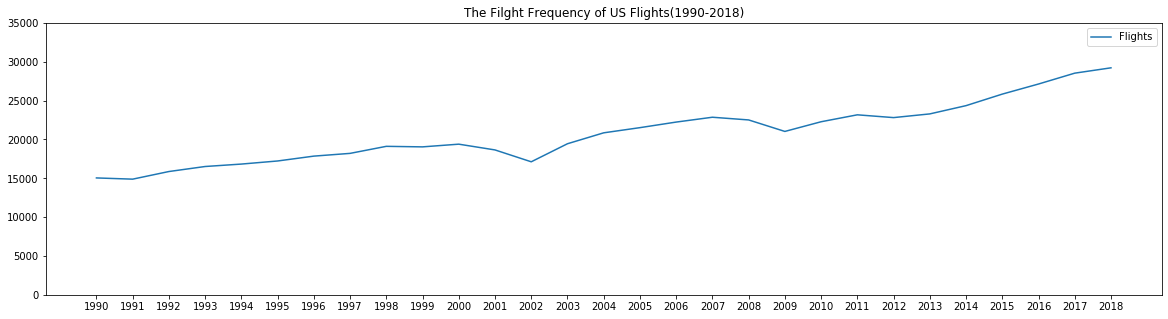

In [6]:
# plot the figure
y.plot(title='The Filght Frequency of US Flights(1990-2018)'
       ,xticks = np.arange(1990,2019,1),yticks = np.arange(0,40000,5000)
       ,figsize = (20,5))
plt.savefig("./images/Intl_Flight_Fre.png", format = "png", dpi = 300)

In [17]:
m = pd.DataFrame(columns=['Flights'])
for i in range(1,13):
    # index is the month
    m.loc[i] = month.count(i)
m

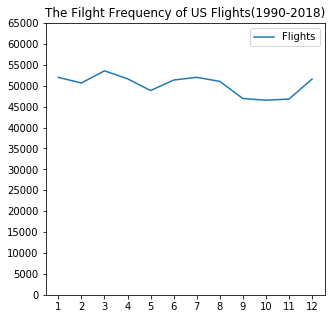

In [8]:
# Month frequency based total of flights
m.plot(title='The Filght Frequency of US Flights(1990-2018)'
       ,xticks = np.arange(1,13,1),yticks = np.arange(0,70000,5000)
       ,figsize = (5,5))
plt.savefig("./images/Intl_Flight_Mon.png", format = "png", dpi = 300)

In [9]:
# based on total number of passengers
passenger =  pd.DataFrame(intl_flt1, columns = ['passengers', 'Year', 'Month'])
passenger

,passengers,Year,Month
0,519027,1990,1
1,573101,1990,1
2,595941,1990,1
3,539867,1990,1
4,513249,1990,1
...,...,...,...
642994,36168,2018,12
642995,36167,2018,12
642996,36166,2018,12
642997,36165,2018,12


In [15]:
# Total of passengers (Year,Month)
p = pd.DataFrame(index= range(1,13), columns=range(1990,2019))
for y in range(1990,2019):
    for m in range(1,13):
        pm = passenger[(passenger['Year'].isin([y])) & (passenger['Month'].isin([m]))]
        total = pm['passengers'].sum()
        p[y][m] = total
p

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,672634036,665448844,718172179,799808976,822852391,814478002,870706715,832451292,914483403,944057290,...,456309759,455283399,755225350,765966413,771272452,1337440098,280352052,229182578,170488444,100156955
2,684986457,621369712,708983266,750428191,785002175,765946165,832120374,797221583,861843604,847574908,...,442712522,442370931,766713228,764856329,744596845,1273865243,265107814,203733501,154306861,85682471
3,689940090,648840805,709827288,802470492,818166750,823982641,898201942,902341010,946248521,954997803,...,459735421,465645063,791078508,810564154,782083783,1315430861,275352297,211002442,155712720,83553469
4,645664121,647037176,700206639,750828488,804441444,784301678,807996480,816398569,875948467,892371839,...,461323096,472949686,796812781,781601949,785365976,1328229365,270544542,208225860,149653955,76980777
5,608676047,606426971,659410457,684453531,683004406,707243684,725255171,757461546,823919229,785059527,...,420101075,461079506,750136509,736285412,757742399,1348930402,263396659,198262192,136268369,70138022
6,639488898,645919481,658723267,692250790,755412474,758088037,768812380,824754691,845131102,850395425,...,440807396,484477393,794887467,761243216,792622814,1390018638,268808606,195452476,137744255,64013729
7,698837659,657490572,734685687,737051530,741038512,744437839,792490219,804761541,853516038,827600445,...,453652685,499225012,782937014,808549958,806787879,1402734854,253167639,201841051,129139417,55863869
8,676766129,657155086,716218409,722283875,697898510,721289026,794977721,775601253,832490156,798323288,...,443614278,468774931,771617485,783112937,778675622,1367019086,243241291,192767468,126037812,48643007
9,647515658,655679825,658860788,652040526,658156711,711544305,729615985,739354011,776123661,788034215,...,391707530,436727948,743502518,699349515,730441565,1255150281,214963004,162838490,106538713,37769011
10,617964999,647376203,652996216,646504570,662454486,694891249,698639877,717256229,753035757,755142522,...,414323343,436842046,723050400,694928026,718787557,260609191,237886491,225038428,169134438,103373461


In [16]:
p1 = pd.DataFrame(p, columns = [2015, 2016, 2017,2018])
p1

,2015,2016,2017,2018
1,280352052,229182578,170488444,100156955
2,265107814,203733501,154306861,85682471
3,275352297,211002442,155712720,83553469
4,270544542,208225860,149653955,76980777
5,263396659,198262192,136268369,70138022
6,268808606,195452476,137744255,64013729
7,253167639,201841051,129139417,55863869
8,243241291,192767468,126037812,48643007
9,214963004,162838490,106538713,37769011
10,237886491,225038428,169134438,103373461


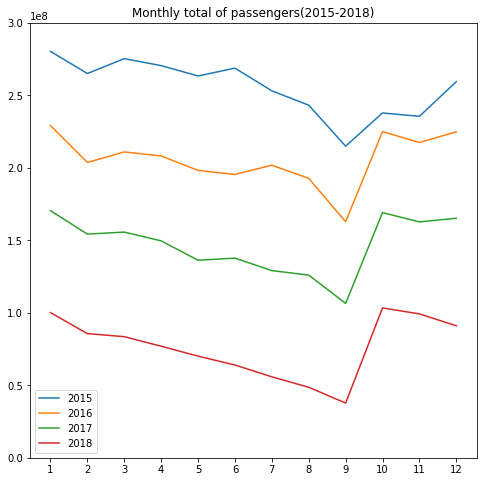

In [12]:
p1.plot(title = 'Monthly total of passengers(2015-2018)',xticks = np.arange(1,13,1),yticks = np.arange(0,350000000,50000000)
       ,figsize = (8,8))